In [2]:
import numpy as np
from matplotlib import pyplot as plt
#imports

# Law of Large Numbers

Let's say we play a game of dice. The dice has equal probability of being a value from [1,6], inclusive. Each side of the dice is associated with a probabilty. This is called a Random Variable.

In [3]:
oneRoll = np.random.randint(1,7) #[1,7)
print(oneRoll)

1


When we generate random variables (each side of the dice) from a distribution (dice), we should expect ~1/6 (0.1667) probability for each side of the dice.

Text(0.5, 0, 'Face of the Die')

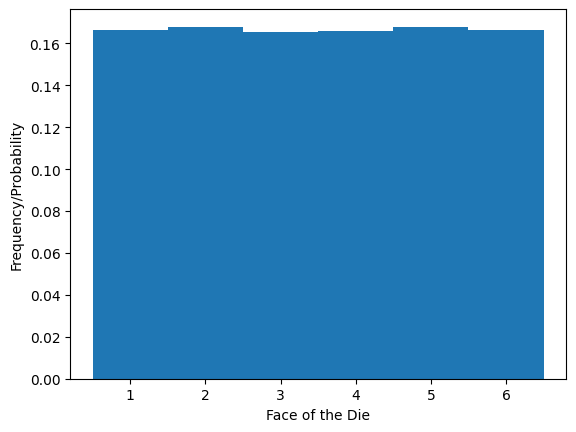

In [4]:
plt.hist(np.random.randint(1, 7, size=100000), bins=np.linspace(0.5, 6.5, 7), density=True) #Density normalizes frequencies
# What happens when we increase the size?

plt.ylabel("Frequency/Probability")
plt.xlabel("Face of the Die")

### Let's compute the average of each round of simulation.

In [5]:
# Simulate a dice roll 100 times, then 200 times, then 300 times...etc. (up to N times) to see each average
N = 20000
simulations = range(100, N, 100) # increasing number of rolls by 100
outcomes = []

for rolls in simulations:
    average = np.mean(np.random.randint(1,7, size = rolls))
    outcomes = outcomes + [average]

Text(0.5, 0, 'Num experiment')

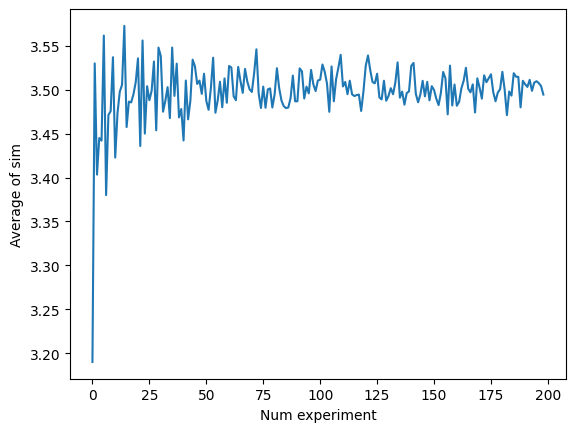

In [6]:
plt.plot(outcomes)
plt.ylabel("Average of sim")
plt.xlabel("Num experiment")

In [7]:
outcomes

[3.19,
 3.53,
 3.4033333333333333,
 3.445,
 3.442,
 3.5616666666666665,
 3.38,
 3.47125,
 3.4755555555555557,
 3.537,
 3.422727272727273,
 3.473333333333333,
 3.497692307692308,
 3.505714285714286,
 3.5726666666666667,
 3.4575,
 3.486470588235294,
 3.4855555555555555,
 3.4947368421052634,
 3.5085,
 3.5357142857142856,
 3.435909090909091,
 3.5560869565217392,
 3.45,
 3.504,
 3.4880769230769233,
 3.4988888888888887,
 3.532142857142857,
 3.453793103448276,
 3.548,
 3.5383870967741937,
 3.475,
 3.4872727272727273,
 3.5029411764705882,
 3.4677142857142855,
 3.5480555555555555,
 3.492972972972973,
 3.529736842105263,
 3.4684615384615385,
 3.478,
 3.4421951219512197,
 3.5104761904761905,
 3.4662790697674417,
 3.4875,
 3.534222222222222,
 3.5267391304347826,
 3.506595744680851,
 3.5104166666666665,
 3.4953061224489796,
 3.5182,
 3.4872549019607844,
 3.477115384615385,
 3.501698113207547,
 3.5364814814814816,
 3.473818181818182,
 3.487857142857143,
 3.509122807017544,
 3.48,
 3.5128813559322034

In [8]:
np.mean(outcomes) # Is this what we should expect?

3.498461511778814

(array([  1.,   0.,   0.,   0.,   1.,   1.,   8.,  71., 105.,  12.]),
 array([3.19      , 3.22826667, 3.26653333, 3.3048    , 3.34306667,
        3.38133333, 3.4196    , 3.45786667, 3.49613333, 3.5344    ,
        3.57266667]),
 <BarContainer object of 10 artists>)

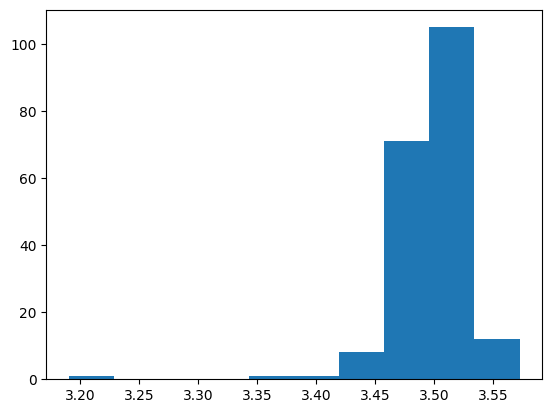

In [9]:
plt.hist(outcomes) # CLT: Is this what we should expect as well? 

Essentially, the Central Limit Theorem states that taking random samples with replacement, and then taking the average of those samples, the averages will follow a normal distribution.

(See https://seeing-theory.brown.edu/probability-distributions/index.html#section3)

Normal distribution is everywhere. We will see this again when we do stock returns.

# Monte Carlo: Estimating Pi

$$\frac{N_{circle}}{N_{total}} = \frac{Area_{circle}}{Area_{Square}}$$

$$Area_{Square} * \frac{N_c}{N_{total}} = Area_{circle}$$

In [10]:
trials = 1000000
radius = 1
inside = 0
outside = 0

x_coords = np.random.uniform(-1, 1, trials)
y_coords = np.random.uniform(-1, 1, trials)
print(x_coords)

[-0.24192097 -0.3690838   0.11176479 ...  0.42865596  0.54130231
  0.52597573]


In [11]:
for i in range(trials):
    if (x_coords[i]**2 + y_coords[i]**2 <= radius**2):
        inside += 1
    else:  
        outside += 1

In [12]:
ratio_circle = inside / (inside + outside) #inside + outside = trials
print(ratio_circle)

0.785637


In [13]:
print("pi is about", 2*radius*radius*2*ratio_circle)

pi is about 3.142548


# Visualizing

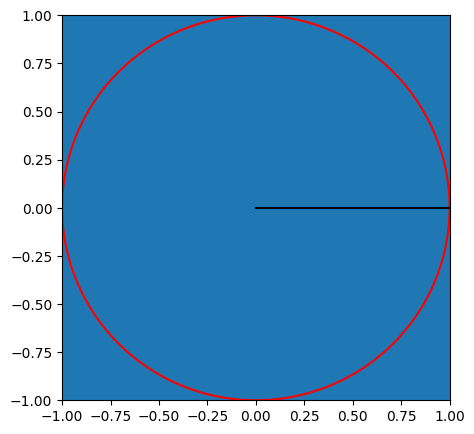

In [14]:
theta = np.linspace(0, 2*np.pi, 1000)
x = radius*np.cos(theta)
y = radius*np.sin(theta)

plt.figure(figsize = (5,5))
plt.plot(x, y, color = 'red')
plt.plot(np.linspace(0, 1, 1000), np.zeros(1000), color = "black")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.scatter(x_coords, y_coords, s = 1)

# Interesting Questions

# #1
![Estimating e](https://ggcarvalho.dev/img/posts/montecarlo/lex.png)

Tips:

1. np.mean(list) gives you the expected value of the list of values
2. list.append(n) adds the number 'n' to the end of the list
3. Always set up the experiment with a for loop of number of trials
4. Think about what variable needs to be resetted after every trial
5. While or for loop? Do you know how many selections needed?

In [15]:
import random
runs = 1000
total = 0
for x in range(runs):
    sum = 0
    trials = 0
    while(sum < 1):
        sum = sum + np.random.uniform(0,1)
        trials = trials + 1
    total = total + trials

avg = total/runs
print(avg)


2.717


# #2

## On average, how many times a die must be rolled until you get a 6?

Tips:

1. np.random.randint(1,7) simulates a dice roll [1,7)
2. While or for loop? Do you know how many selections needed?
3. What should you expect?

In [16]:
total = 0
for x in range(1000):
    res = 0
    trials = 0
    while(res != 6):
        res = np.random.randint(1,7)
        trials = trials + 1
    total = total + trials

avg = total/1000
print(avg)

6.131


# #3

## If you break a stick of unit length at a point chosen uniformly at random, then what is the expected length of the shorter stick? What about the ratio of smaller to longer?

In [25]:
# length = 1
# total = 0
# totalLong = 0
# for x in range(100000):
#     point = np.random.uniform(0,length)
#     if(point < length/2):
#         short = point
#     else:
#         short = length - point
#     long = length - short
#     total = total + short
#     totalLong = totalLong + long

    
# avg = total/100000
# avgLong = totalLong/100000
# ratio = avg/length
# ratioSmallerLonger = avg/avgLong
# print(ratio)
# print(ratioSmallerLonger)

length = 1

results = []

for sim in range(100000):
    point = np.random.uniform(0,length)
    if point <= 0.5:
        short = point
        long = 1-point
    else:
        long = point
        short = 1-point
    results.append(short/long)

np.mean(results)

#TIPS:
#1) How do you do one iteration/experiment
#2) what do you ne

0.3856466147909264

# #4

## An unfair coin is rolled 100 times. The probability of tails is 38 percent. What is the probability that there at least 40 heads? Use plt.hist() to see if your answer makes sense.

Tips:

1. np.random.binomial? How many trials, what's the probability, and what should n be? (Hint: Flipping 1 coin is a Bernoulli process)

# #5

## Benford's Law? Make a histogram plot of first digit in a distribution of numbers. (What distribution should you do? What do you assume?)

In [ ]:
# Benford's Law says that the leading digit of real life numerical dataset is likely to be small. 
# For example, 1 should occur the most as the leading digit, 2 the second most, etc.
# Pretty cool to read about. https://en.wikipedia.org/wiki/Benford%27s_law



# #6

## Recreate the Monty Hall Problem and see if it is actually good to switch doors (Hint: it is).